In [ ]:
# cnn model
import keras
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets
import sys
sys.path.insert(0,'..')

### Read the train & test and preprocessing

In [ ]:
# load data
import pandas as pd
df = pd.read_csv('avila.txt', sep=",", header=None)
df.columns = ["col1", "col2", "col3", "col4", "col5", "col6", "col7", "col8", "col9", "col10", "target"]

In [3]:
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,target
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,0
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,0
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,0
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,0
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,5


In [4]:
# df to values
df = df.values
Y = df[:,10]
X = df[:,0:10]

In [5]:
#Load the data, split into training/testing groups
x_train, x_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.3, shuffle= True)
x_train_, x_test_, y_train_, y_test_ = x_train, x_test, y_train, y_test
# The known number of output classes.
num_classes = len(np.unique(y_train))
# Input image dimensions
input_shape = (X.shape[1],)

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], X.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], X.shape[1],1)

### Creation structure of CNN

In [6]:
# build CNN
def CNN_net():
    model = Sequential()
    
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1],1)))
    model.add(MaxPooling1D(pool_size=2))
    #model.add(Dropout(0.5))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    #model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(X.shape[1]))
    model.add(Activation('relu'))
    #model.add(Dense(X.shape[1]))
    #model.add(Activation('relu'))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

In [7]:
# Parametres
verbose, epochs, batch_size = 1, 200, 32
# initialize the model object
clf_cnn = CNN_net()
# fit network
history = clf_cnn.fit(x_train, y_train_binary, batch_size=batch_size,
          epochs=epochs, verbose=verbose, validation_data=(x_test, y_test_binary))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 14606 samples, validate on 6261 samples
Epoch 1/200
14606/14606 [==============================] - 1s 92us/step - loss: 1.7150 - accuracy: 0.4484 - val_loss: 1.4386 - val_accuracy: 0.5006
Epoch 2/200
14606/14606 [==============================] - 1s 83us/step - loss: 1.3653 - accuracy: 0.5287 - val_loss: 1.2692 - val_accuracy: 0.5657
Epoch 3/200
14606/14606 [==============================] - 1s 85us/step - loss: 1.2434 - accuracy: 0.5624 - val_loss: 1.2057 - val_accuracy: 0.5851
Epoch 4/200
14606/14606 [==============================] - 1s 79us/step - loss: 1.1875 - accuracy: 0.5808 - val_loss: 1.1427 - val_accuracy: 0.5972
Epoch 5/200
14606/14606 [==============================] - 1s 79us/step - loss: 1.1203 - accuracy: 0.5914 - val_loss: 1.1305 - val_accuracy: 0.5977
Epoch 6/200
14606/14606 [==============================] - 1s 80us/step - loss: 1.0765 - accuracy: 0.6039 - val_loss: 1.0559 - v

Epoch 50/200
14606/14606 [==============================] - 1s 79us/step - loss: 0.5280 - accuracy: 0.7941 - val_loss: 0.6163 - val_accuracy: 0.7706
Epoch 51/200
14606/14606 [==============================] - 1s 78us/step - loss: 0.5235 - accuracy: 0.7991 - val_loss: 0.6048 - val_accuracy: 0.7748
Epoch 52/200
14606/14606 [==============================] - 1s 74us/step - loss: 0.5264 - accuracy: 0.7982 - val_loss: 0.6002 - val_accuracy: 0.7769
Epoch 53/200
14606/14606 [==============================] - 1s 74us/step - loss: 0.5319 - accuracy: 0.7958 - val_loss: 0.6081 - val_accuracy: 0.7766
Epoch 54/200
14606/14606 [==============================] - 1s 74us/step - loss: 0.5161 - accuracy: 0.7999 - val_loss: 0.5806 - val_accuracy: 0.7841
Epoch 55/200
14606/14606 [==============================] - 1s 73us/step - loss: 0.5128 - accuracy: 0.8042 - val_loss: 0.6134 - val_accuracy: 0.7783
Epoch 56/200
14606/14606 [==============================] - 1s 85us/step - loss: 0.5141 - accuracy: 0.8018

Epoch 105/200
14606/14606 [==============================] - 1s 73us/step - loss: 0.4084 - accuracy: 0.8438 - val_loss: 0.5462 - val_accuracy: 0.8174
Epoch 106/200
14606/14606 [==============================] - 1s 78us/step - loss: 0.4065 - accuracy: 0.8464 - val_loss: 0.5284 - val_accuracy: 0.8160
Epoch 107/200
14606/14606 [==============================] - 1s 73us/step - loss: 0.4008 - accuracy: 0.8465 - val_loss: 0.5552 - val_accuracy: 0.8122
Epoch 108/200
14606/14606 [==============================] - 1s 74us/step - loss: 0.3979 - accuracy: 0.8452 - val_loss: 0.5879 - val_accuracy: 0.8011
Epoch 109/200
14606/14606 [==============================] - 1s 72us/step - loss: 0.4014 - accuracy: 0.8468 - val_loss: 0.6028 - val_accuracy: 0.7928
Epoch 110/200
14606/14606 [==============================] - 1s 72us/step - loss: 0.4034 - accuracy: 0.8443 - val_loss: 0.5512 - val_accuracy: 0.8152
Epoch 111/200
14606/14606 [==============================] - 1s 75us/step - loss: 0.3944 - accuracy:

14606/14606 [==============================] - 1s 72us/step - loss: 0.3349 - accuracy: 0.8753 - val_loss: 0.5320 - val_accuracy: 0.8339
Epoch 160/200
14606/14606 [==============================] - 1s 77us/step - loss: 0.3443 - accuracy: 0.8690 - val_loss: 0.5165 - val_accuracy: 0.8347
Epoch 161/200
14606/14606 [==============================] - 1s 73us/step - loss: 0.3416 - accuracy: 0.8714 - val_loss: 0.5404 - val_accuracy: 0.8234
Epoch 162/200
14606/14606 [==============================] - 1s 74us/step - loss: 0.3387 - accuracy: 0.8705 - val_loss: 0.5382 - val_accuracy: 0.8342
Epoch 163/200
14606/14606 [==============================] - 1s 73us/step - loss: 0.3393 - accuracy: 0.8716 - val_loss: 0.5283 - val_accuracy: 0.8305
Epoch 164/200
14606/14606 [==============================] - 1s 72us/step - loss: 0.3437 - accuracy: 0.8679 - val_loss: 0.5233 - val_accuracy: 0.8396
Epoch 165/200
14606/14606 [==============================] - 1s 73us/step - loss: 0.3388 - accuracy: 0.8709 - val_

In [8]:
# call predict to get predictions Report the accuracy
clf_cnn.evaluate(x_test, y_test_binary)

6261/6261 [==============================] - 0s 29us/step


[0.5233950362625718, 0.845232367515564]

In [9]:
# call predict to get predictions
y_pred = clf_cnn.predict(x_test)
y_pred = np.round(y_pred)
from sklearn.metrics import accuracy_score
# Report the accuracy
accuracy_CNN = accuracy_score(y_test_binary, y_pred)
print("CNN : Accuracy: " + str(accuracy_CNN))

CNN : Accuracy: 0.8348506628334131


In [10]:
clf_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2, 64)             6208      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_1 (Activation)    (None, 10)               

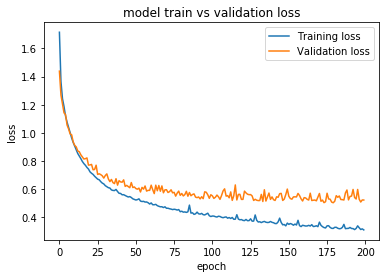

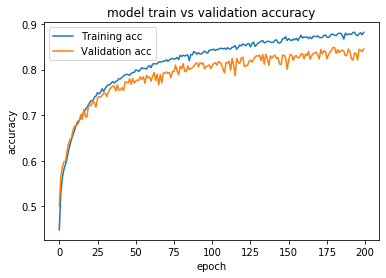

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation loss'], loc='best')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training acc','Validation acc'], loc='best')
plt.show()

### Testing the Novel Approach

### Feature Extraction by CNN

In [12]:
from keras.models import Model
# from the first Fully-Connected layer 
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=clf_cnn.input,
                                 outputs=clf_cnn.get_layer(layer_name).output)

In [13]:
# Save the features of the train dataset to use it in future.
out_cnn_train = intermediate_layer_model.predict(x_train)
# Save the features of the test dataset to use it in future.
out_cnn_test = intermediate_layer_model.predict(x_test)

In [14]:
print('Training Features (from CNN) Shape:', out_cnn_train.shape)
print('Training Labels (from CNN) Shape:', y_train.shape)

print('Test Features (from CNN) Shape:', out_cnn_test.shape)
print('Test Labels (from CNN) Shape:', y_test.shape)

Training Features (from CNN) Shape: (14606, 10)
Training Labels (from CNN) Shape: (14606,)
Test Features (from CNN) Shape: (6261, 10)
Test Labels (from CNN) Shape: (6261,)


### Classification by CNN + Random Forest + MLP

In [15]:
from djinn import djinn

print("djinn aloi")    
modelname="class_djinn_aloi"   # name the model
ntrees=3                 # number of trees = number of neural nets in ensemble
maxdepth=4               # max depth of tree -- optimize this for each data set
dropout_keep=1.0 

#initialize the model
model=djinn.DJINN_Classifier(ntrees,maxdepth,dropout_keep)

x_train, y_train, x_test, y_test = out_cnn_train, y_train, out_cnn_test, y_test 
# find optimal settings: this function returns dict with hyper-parameters
# each djinn function accepts random seeds for reproducible behavior
# optimal=model.get_hyperparameters(x_train, y_train, random_state=1)
# batchsize=optimal['batch_size']
# learnrate=optimal['learn_rate']
# epochs=optimal['epochs']

batchsize=1750
learnrate=0.00643986000283503
epochs=210

# train the model with hyperparameters determined above
model.train(x_train,y_train,epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname, random_state=1)

# *note there is a function model.fit(x_train,y_train, ... ) that wraps 
# get_hyperparameters() and train(), so that you do not have to manually
# pass hyperparameters to train(). However, get_hyperparameters() can
# be expensive, so I recommend running it once per dataset and using those
# hyperparameter values in train() to save computational time
# make predictions
m=model.predict(x_test) #returns the median prediction if more than one tree

import sklearn
#evaluate results
acc=sklearn.metrics.accuracy_score(y_test,m.flatten())  
#close model 
model.close_model()

djinn aloi




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





Epoch: 0001 cost= 2.824552877 accuracy= 0.051
Epoch: 0002 cost= 2.371128321 accuracy= 0.187
Epoch: 0003 cost= 1.957742793 accuracy= 0.412
Epoch: 0004 cost= 1.869040302 accuracy= 0.412
Epoch: 0005 cost= 1.859551021 accuracy= 0.412
Epoch: 0006 cost= 1.827821936 accuracy= 0.412
Epoch: 0007 cost= 1.841357810 accur

Epoch: 0136 cost= 1.453020573 accuracy= 0.487
Epoch: 0137 cost= 1.458654676 accuracy= 0.489
Epoch: 0138 cost= 1.481338416 accuracy= 0.478
Epoch: 0139 cost= 1.453031387 accuracy= 0.483
Epoch: 0140 cost= 1.450374178 accuracy= 0.484
Epoch: 0141 cost= 1.446518626 accuracy= 0.487
Epoch: 0142 cost= 1.446280752 accuracy= 0.485
Epoch: 0143 cost= 1.444492425 accuracy= 0.486
Epoch: 0144 cost= 1.447947655 accuracy= 0.488
Epoch: 0145 cost= 1.458519544 accuracy= 0.486
Epoch: 0146 cost= 1.448281458 accuracy= 0.490
Epoch: 0147 cost= 1.444407208 accuracy= 0.489
Epoch: 0148 cost= 1.470206976 accuracy= 0.482
Epoch: 0149 cost= 1.472511002 accuracy= 0.477
Epoch: 0150 cost= 1.470433474 accuracy= 0.479
Epoch: 0151 cost= 1.449858665 accuracy= 0.483
Epoch: 0152 cost= 1.443818842 accuracy= 0.488
Epoch: 0153 cost= 1.449587839 accuracy= 0.489
Epoch: 0154 cost= 1.466443675 accuracy= 0.484
Epoch: 0155 cost= 1.463084187 accuracy= 0.481
Epoch: 0156 cost= 1.471328565 accuracy= 0.480
Epoch: 0157 cost= 1.426883817 accu

Epoch: 0105 cost= 1.479519657 accuracy= 0.482
Epoch: 0106 cost= 1.481776953 accuracy= 0.484
Epoch: 0107 cost= 1.465956977 accuracy= 0.484
Epoch: 0108 cost= 1.474354591 accuracy= 0.483
Epoch: 0109 cost= 1.482027973 accuracy= 0.484
Epoch: 0110 cost= 1.477621521 accuracy= 0.485
Epoch: 0111 cost= 1.472430195 accuracy= 0.487
Epoch: 0112 cost= 1.467349138 accuracy= 0.486
Epoch: 0113 cost= 1.467487318 accuracy= 0.481
Epoch: 0114 cost= 1.485091891 accuracy= 0.484
Epoch: 0115 cost= 1.466468743 accuracy= 0.485
Epoch: 0116 cost= 1.474752733 accuracy= 0.485
Epoch: 0117 cost= 1.468903422 accuracy= 0.485
Epoch: 0118 cost= 1.465414524 accuracy= 0.486
Epoch: 0119 cost= 1.472287604 accuracy= 0.487
Epoch: 0120 cost= 1.454474432 accuracy= 0.487
Epoch: 0121 cost= 1.470588991 accuracy= 0.486
Epoch: 0122 cost= 1.463894895 accuracy= 0.482
Epoch: 0123 cost= 1.477526750 accuracy= 0.471
Epoch: 0124 cost= 1.487645030 accuracy= 0.473
Epoch: 0125 cost= 1.485202721 accuracy= 0.482
Epoch: 0126 cost= 1.479352883 accu

Epoch: 0072 cost= 1.579346214 accuracy= 0.449
Epoch: 0073 cost= 1.573608586 accuracy= 0.459
Epoch: 0074 cost= 1.572520750 accuracy= 0.469
Epoch: 0075 cost= 1.579094785 accuracy= 0.467
Epoch: 0076 cost= 1.561293840 accuracy= 0.462
Epoch: 0077 cost= 1.563018220 accuracy= 0.451
Epoch: 0078 cost= 1.546925800 accuracy= 0.463
Epoch: 0079 cost= 1.546865531 accuracy= 0.473
Epoch: 0080 cost= 1.515475563 accuracy= 0.473
Epoch: 0081 cost= 1.529055987 accuracy= 0.472
Epoch: 0082 cost= 1.521417175 accuracy= 0.476
Epoch: 0083 cost= 1.516602533 accuracy= 0.474
Epoch: 0084 cost= 1.530458740 accuracy= 0.474
Epoch: 0085 cost= 1.524054698 accuracy= 0.475
Epoch: 0086 cost= 1.503591384 accuracy= 0.475
Epoch: 0087 cost= 1.488098979 accuracy= 0.475
Epoch: 0088 cost= 1.507535219 accuracy= 0.474
Epoch: 0089 cost= 1.505548630 accuracy= 0.474
Epoch: 0090 cost= 1.510244778 accuracy= 0.476
Epoch: 0091 cost= 1.490437405 accuracy= 0.470
Epoch: 0092 cost= 1.509289435 accuracy= 0.470
Epoch: 0093 cost= 1.507398895 accu

### Classification by CNN + ( SVM, XGB, DTree, ExtraTrees, RandomFores)


In [16]:
#Feed the extracted features with the labels to RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(out_cnn_train, y_train)
#Feed the features of the test to Random Forest Classifier to predict its class
predictions = rf.predict(out_cnn_test)
accuracy_CNN_RF=accuracy_score(predictions , y_test)
#print('CNN+RF : Accuracy:', accuracy_CNN_RF, '%.')

from sklearn.ensemble import ExtraTreesClassifier
Ext = ExtraTreesClassifier(n_estimators=100)
Ext.fit(out_cnn_train, y_train)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictions = Ext.predict(out_cnn_test)
accuracy_CNN_Ext=accuracy_score(predictions , y_test)
#print('CNN+Extrat : Accuracy:', accuracy_CNN_Ext, '%.')


#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(out_cnn_train, y_train)
#print('The accuracy of the SVM classifier on training data is {:.4f}'.format(svm.score(x_train, y_train)))


#Applying XGBoost
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(out_cnn_train, y_train)
#print('The accuracy of the XGBoost classifier on training data is {:.4f}'.format(xgb_clf.score(x_train, y_train)))


#Applying Decision Tree
from sklearn import tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier()
#Train DT based on scaled training set
decision_tree.fit(out_cnn_train, y_train)
#Print performance
#print('The accuracy of the Decision Tree classifier on training data is {:.4f}'.format(decision_tree.score(x_train, y_train)))


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with the best KNN model
# This will allow us to get a better results
cx_train = np.concatenate((x_train, x_test), 0)
cy_train = np.concatenate((y_train, y_test), 0)

### Classification by RandomForest, ExtraTrees

In [18]:
# RandomForestClassifier : from dataset originl
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_, y_train_)
predictions = rf.predict(x_test_)
accuracy_RF=accuracy_score(predictions , y_test_)
#print('RF : Accuracy:', accuracy_RF, '%.')

# ExtraTreesClassifier : from dataset originl
Extra = ExtraTreesClassifier(n_estimators=100)
Extra.fit(x_train_, y_train_)
predictions = Extra.predict(x_test_)
accuracy_Extra=accuracy_score(predictions , y_test_)
#print('Extra : Accuracy:', accuracy_Extra, '%.')

###  Score

In [19]:
print('Accuracy RF          ::',  "{:.4f}".format(accuracy_RF),'%.')
print('Accuracy Extrat      ::',  "{:.4f}".format(accuracy_Extra),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN         ::',  "{:.4f}".format(accuracy_CNN), '%.')
print('Accuracy CNN+RF      ::',  "{:.4f}".format(accuracy_CNN_RF), '%.')
print('Accuracy CNN+Extrat  ::',  "{:.4f}".format(accuracy_CNN_Ext), '%.')
print('Accuracy CNN+SVM     :: {:.4f}'.format(svm.score(x_test, y_test)),'%.')
print('Accuracy CNN+XGBoost :: {:.4f}'.format(xgb_clf.score(x_test, y_test)),'%.')
print('Accuracy CNN+DTree   :: {:.4f}'.format(decision_tree.score(x_test, y_test)),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN+RF+MLP  ::',  "{:.4f}".format(acc),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN+SVM using cv=10     :: {:.4f}' .format(cross_val_score(svm, cx_train, cy_train, cv=10, scoring='accuracy').mean()),'%.')
print('Accuracy CNN+rf  using cv=10     :: {:.4f}' .format(cross_val_score(rf, cx_train, cy_train, cv=10, scoring='accuracy').mean() ),'%.')
print('Accuracy CNN+XGBoost using cv=10 :: {:.4f}'.format(cross_val_score(xgb_clf, cx_train, cy_train, cv=10, scoring='accuracy').mean() ),'%.')

Accuracy RF          :: 0.9933 %.
Accuracy Extrat      :: 0.9912 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN         :: 0.8349 %.
Accuracy CNN+RF      :: 0.8786 %.
Accuracy CNN+Extrat  :: 0.8930 %.
Accuracy CNN+SVM     :: 0.8238 %.
Accuracy CNN+XGBoost :: 0.8756 %.
Accuracy CNN+DTree   :: 0.7855 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN+RF+MLP  :: 0.4878 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN+SVM using cv=10     :: 0.8487 %.
Accuracy CNN+rf  using cv=10     :: 0.8986 %.
Accuracy CNN+XGBoost using cv=10 :: 0.9032 %.


In [20]:
#https://datascience.stackexchange.com/questions/38957/keras-conv1d-for-simple-data-target-prediction